<a href="https://colab.research.google.com/github/Sravya106/Titanic-Classification/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


In [7]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import RidgeClassifierCV, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [8]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [9]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix

# Data pre-processing

In [ ]:
train_data = pd.read_csv('train (1).csv')
test_data = pd.read_csv('test (1).csv')

In [11]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
test_data.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [14]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [15]:
drop_columns = ['PassengerId', 'Name', 'Ticket']

In [16]:

train_data.drop(columns = drop_columns, axis=1, inplace=True)
train_data.head()



,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [17]:
test_data.drop(columns = drop_columns, axis = 1, inplace = True)


In [18]:
average_age = train_data['Age'].mean()
train_data['Age'].fillna(average_age, inplace=True)

In [19]:
test_data['Age'].fillna(average_age, inplace=True)


In [20]:
average_fare = test_data['Fare'].mean()

In [21]:
test_data['Fare'].fillna(average_fare, inplace = True)

In [22]:
label_encoder = LabelEncoder()

for column in test_data:
    if test_data[column].dtype == 'object':
        test_data[column] = label_encoder.fit_transform(test_data[column]).astype(int)

In [23]:
for column in test_data:
    if train_data[column].dtype == 'object':
        train_data[column] = label_encoder.fit_transform(train_data[column]).astype(int)

In [24]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,147,2
1,1,1,0,38.0,1,0,71.2833,81,0
2,1,3,0,26.0,0,0,7.9250,147,2
3,1,1,0,35.0,1,0,53.1000,55,2
4,0,3,1,35.0,0,0,8.0500,147,2


# Data Vizualization

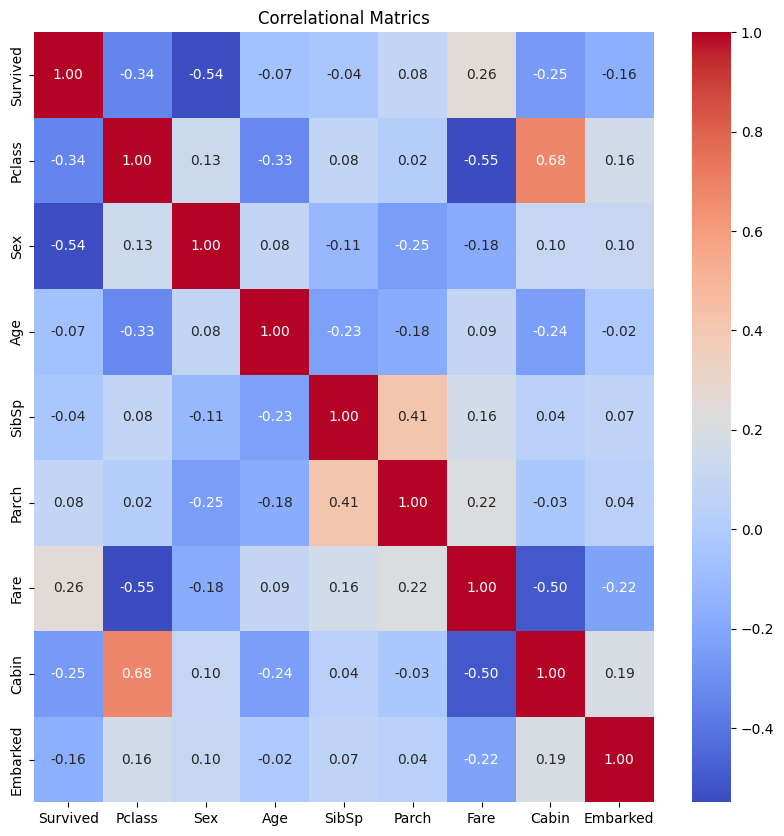

In [25]:
corr_matrics = train_data.corr()
plt.figure(figsize = (10, 10))
sns.heatmap(corr_matrics, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlational Matrics')
plt.show()

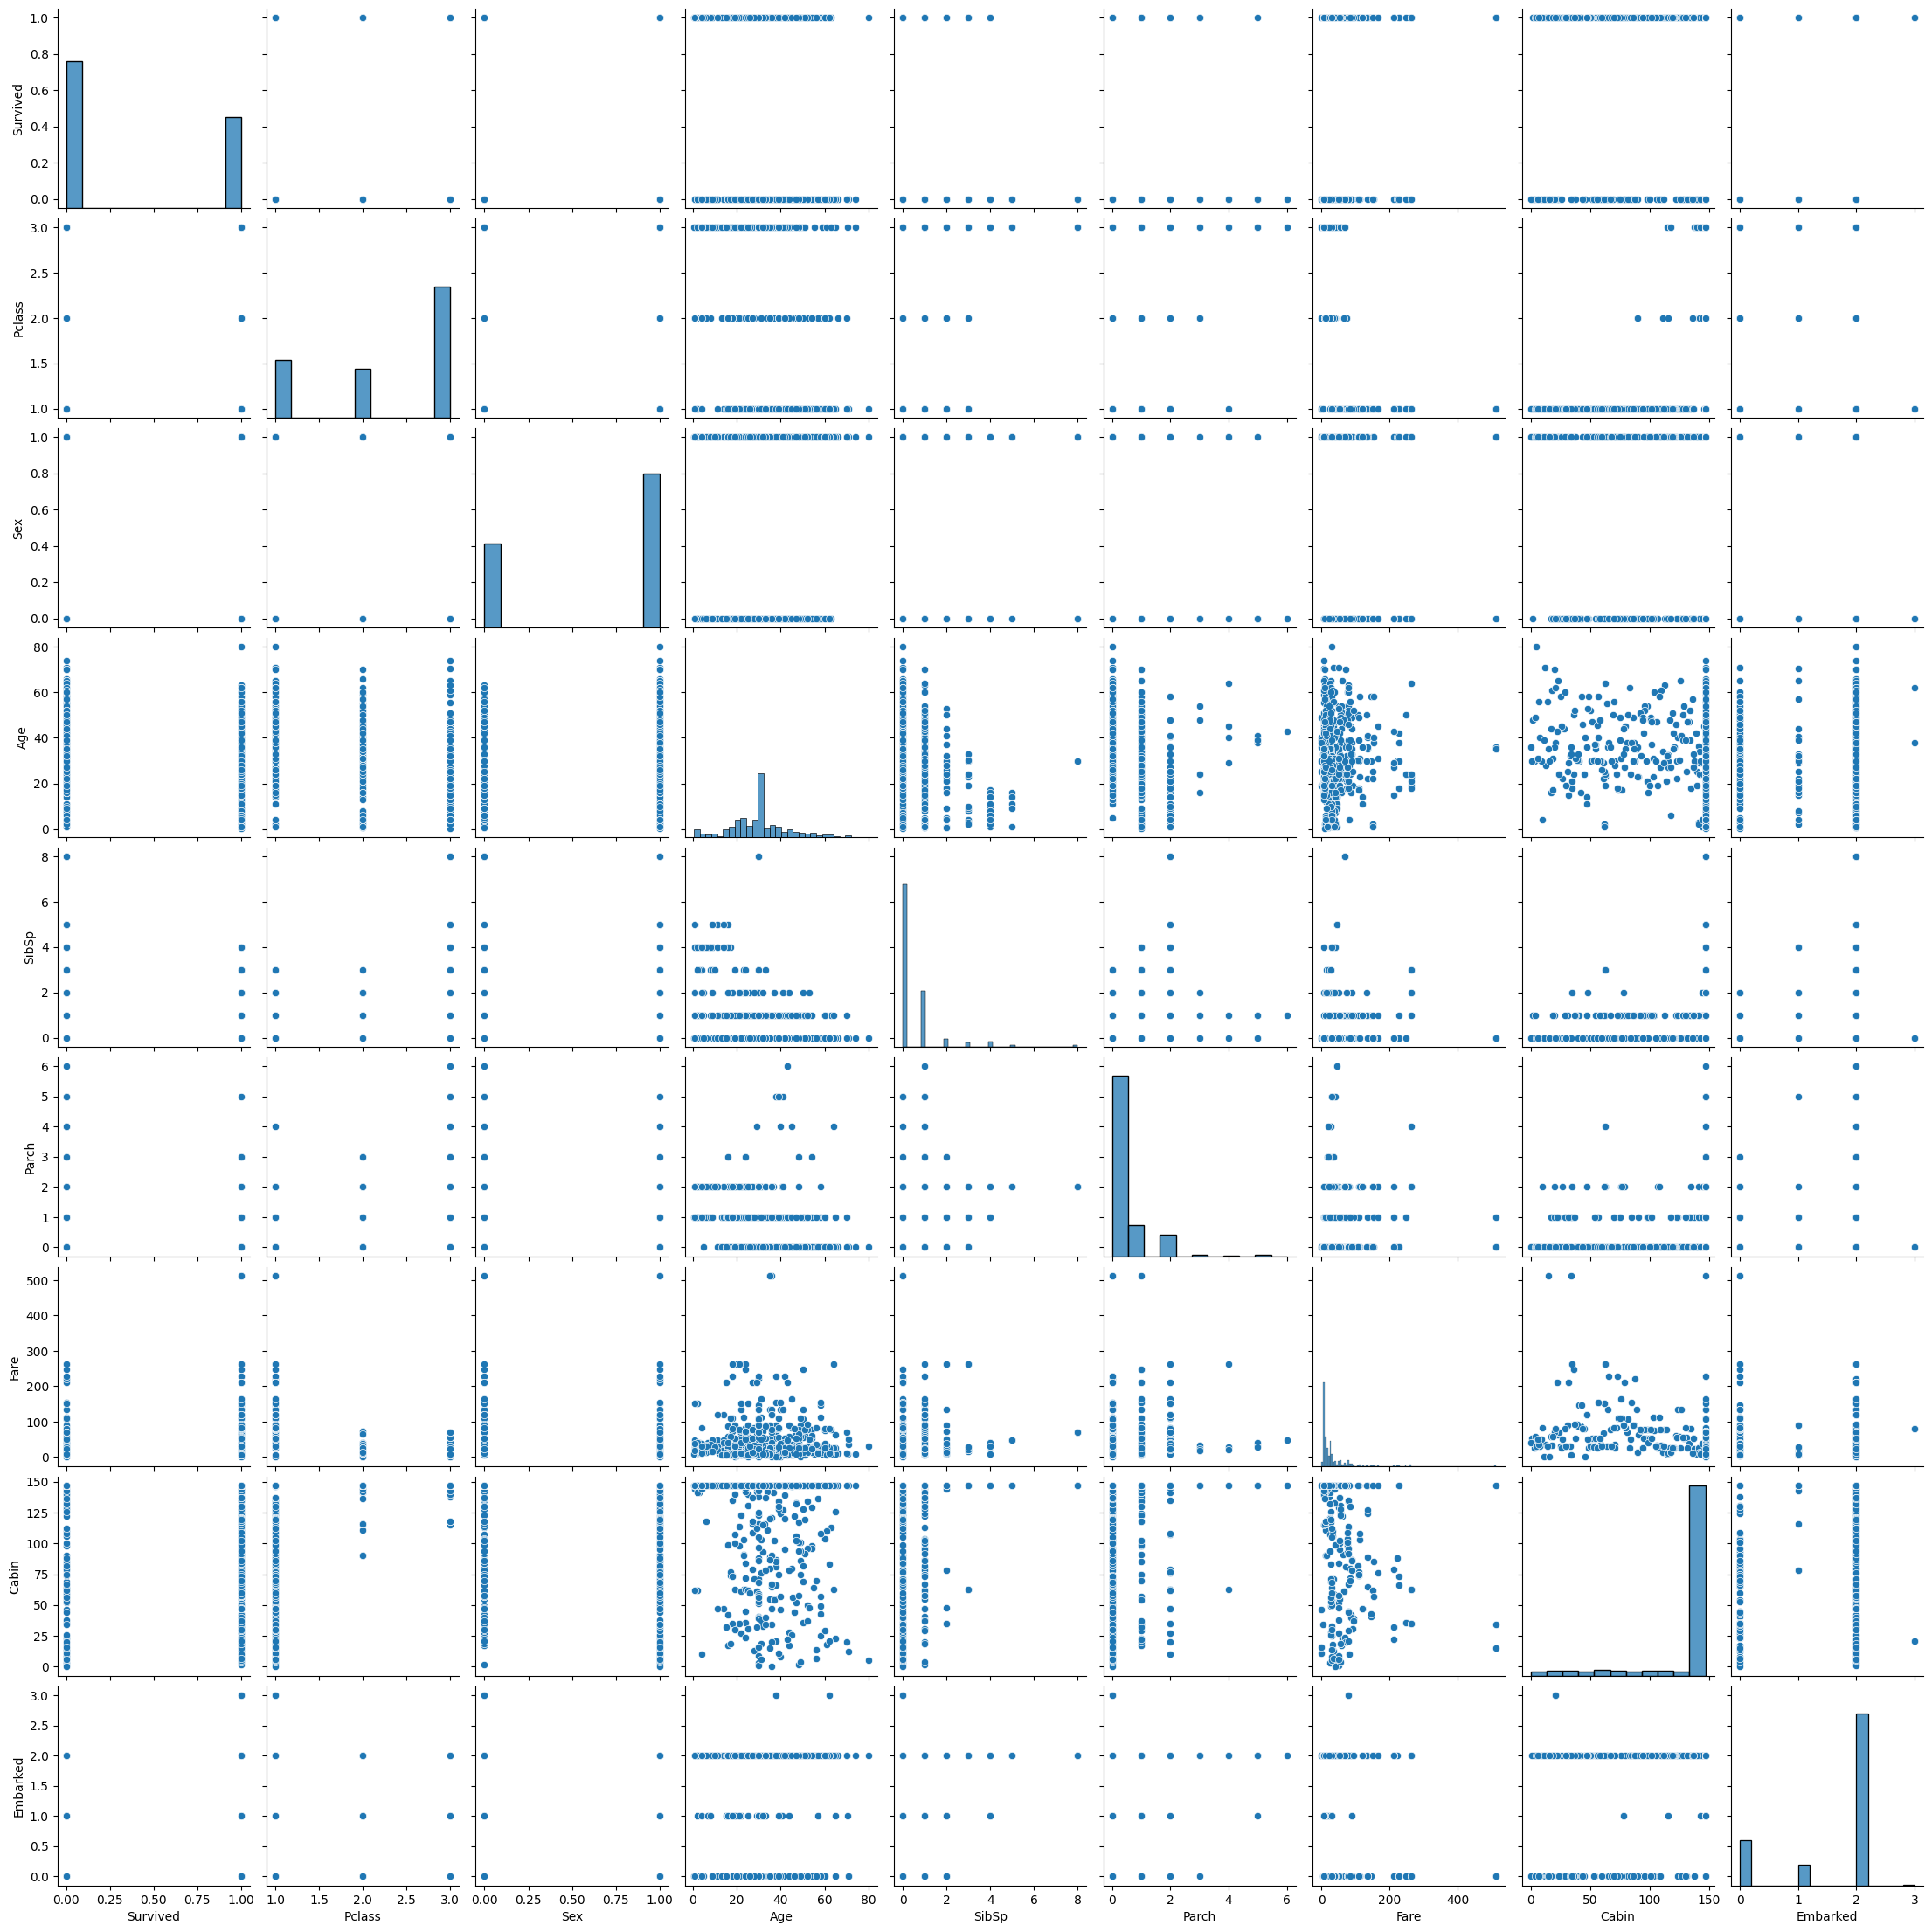

In [26]:
sns.pairplot(train_data)

# train_test_split

In [27]:
X_train = train_data.iloc[:, 1:]

In [28]:
y_train = train_data.iloc[:, 0]

In [29]:
X_test = test_data

In [31]:
labels = pd.read_csv('labels.csv')

In [32]:
y_test = labels.iloc[:, 1]

In [33]:
y_test.info()

<class 'pandas.core.series.Series'>
RangeIndex: 418 entries, 0 to 417
Series name: Survived
Non-Null Count  Dtype
--------------  -----
418 non-null    int64
dtypes: int64(1)
memory usage: 3.4 KB


In [34]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Cabin     418 non-null    int64  
 7   Embarked  418 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 26.2 KB


# Model1
> Support Vector Classifier



In [35]:
svc = SVC(kernel = 'linear')
model1 = svc.fit(X_train, y_train)

In [36]:
y_pred = model1.predict(X_test)
mae1 = mean_absolute_error(y_test, y_pred)
accuracy1 = accuracy_score(y_test, y_pred)
print("Mean Absolute Error for SVM: ", mae1)
print("accuracy score for SVM: ", accuracy1*100)

Mean Absolute Error for SVM:  0.0
accuracy score for SVM:  100.0


In [37]:
cm = confusion_matrix(y_test, y_pred)

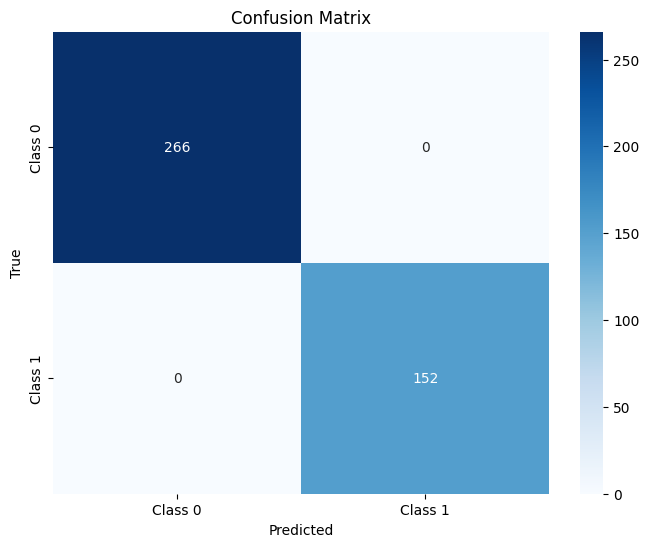

In [38]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


# Model 2
> Decision Tree Classifier



In [39]:
hp_grid = {
    'criterion' : [ 'gini' , 'entropy', 'log_loss'],
}

In [40]:
dtc = DecisionTreeClassifier()
search = RandomizedSearchCV(estimator=dtc, param_distributions=hp_grid, refit=True)
search.fit(X_train, y_train)
model2 = search.best_estimator_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [71]:
print(search.best_params_)
y_pred = model2.predict(X_test)
mae2 = mean_absolute_error(y_test, y_pred)
accuracy2 = accuracy_score(y_test, y_pred)
print("Mean Absolute Error for Decision Tree: ", mae2)
print("accuracy score for Decision Tree: ", accuracy2*100)

{'class_weight': None, 'alphas': (0.1, 1.0, 10.0)}
Mean Absolute Error for Decision Tree:  0.21052631578947367
accuracy score for Decision Tree:  78.94736842105263


In [42]:
cm = confusion_matrix(y_test, y_pred)

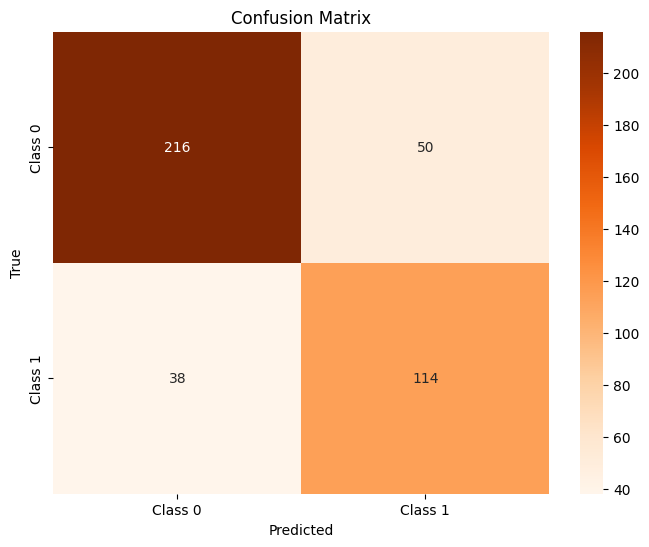

In [43]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Model 3




> Ridge Classifier with Cross Validation





In [44]:
hp_grid = {
    'alphas': [(0.1, 1.0, 10.0), (0.1, 1.0, 5.0, 10.0), (0.1, 1.0, 2.0, 5.0, 10.0)],
    'class_weight': [None, 'balanced'],
}

In [45]:
rccv = RidgeClassifierCV(cv = 3)
search = RandomizedSearchCV(estimator = rccv, param_distributions = hp_grid)
search.fit(X_train, y_train)

model3 = search.best_estimator_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [72]:
print(search.best_params_)
y_pred = model3.predict(X_test)
mae3 = mean_absolute_error(y_test, y_pred)
accuracy3 = accuracy_score(y_test, y_pred)
print("Mean Absolute Error for Ridge Classification: ", mae3)
print("accuracy score for Ridge Classification: ", accuracy3*100)

{'class_weight': None, 'alphas': (0.1, 1.0, 10.0)}
Mean Absolute Error for Ridge Classification:  0.03827751196172249
accuracy score for Ridge Classification:  96.17224880382776


In [47]:
cm = confusion_matrix(y_test, y_pred)

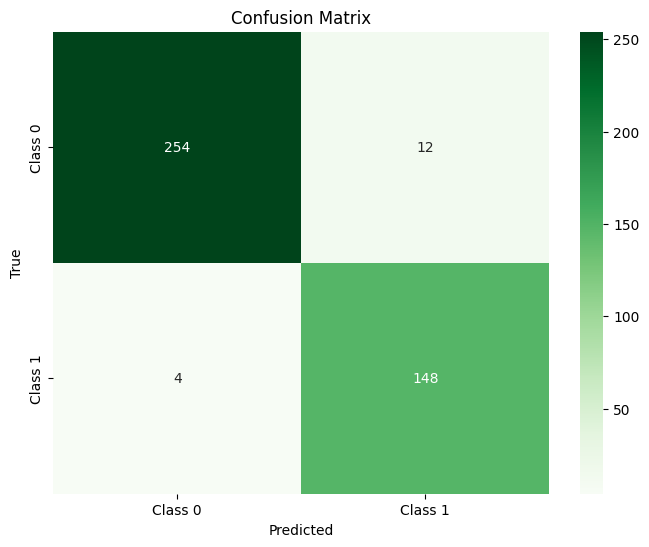

In [48]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Model 4


> Logistic Regression with cross vaidation



In [ ]:
param_grid = {
    'Cs': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}


lrcv = LogisticRegressionCV(cv=5)
grid_search = GridSearchCV(lrcv, param_grid, cv=5)
grid_search.fit(X_train, y_train)


In [73]:
print(grid_search.best_params_)


{'subsample': 0.8, 'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 3, 'learning_rate': 0.2}


In [51]:
model4 = grid_search.best_estimator_

In [52]:
y_pred = model4.predict(X_test)
mae4 = mean_absolute_error(y_test, y_pred)
accuracy4 = accuracy_score(y_test, y_pred)
print("Mean Absolute Error for Logistic Regression: ", mae4)
print("accuracy score for Logistioc Regression: ", accuracy4*100)

Mean Absolute Error for Logistic Regression:  0.05741626794258373
accuracy score for Logistioc Regression:  94.25837320574163


In [53]:
cm = confusion_matrix( y_test, y_pred)

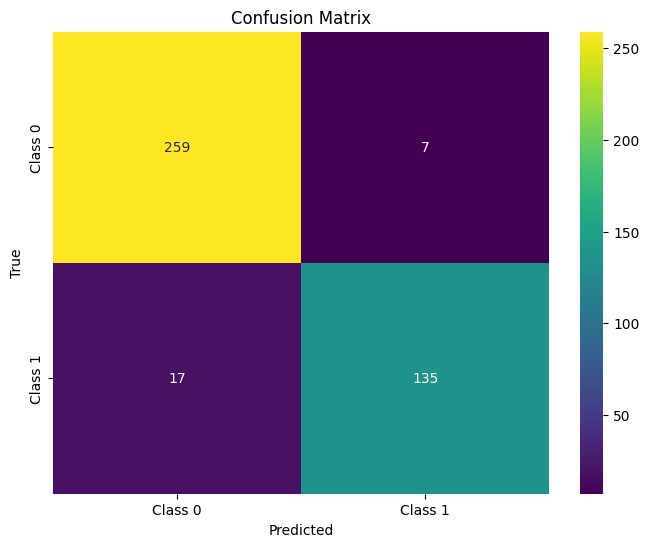

In [54]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="viridis", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Model 5


> Random Forest



In [91]:
param_grid = {
    'n_estimators': [100],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}



In [92]:
rf = RandomForestClassifier()

grid_search = GridSearchCV(rf, param_grid, cv=5)
model5 = grid_search.fit(X_train, y_train)

In [93]:
print(model5.best_params_)
model5 = model5.best_estimator_

{'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


In [94]:
y_pred = model5.predict(X_test)
mae5 = mean_absolute_error(y_test, y_pred)
accuracy5 = accuracy_score(y_test, y_pred)
print("Mean Absolute Error for Random Forest : ", mae5)
print("accuracy score for Random Forest : ", accuracy5*100)

Mean Absolute Error for Random Forest :  0.09808612440191387
accuracy score for Random Forest :  90.19138755980862


In [95]:
cm = confusion_matrix( y_test, y_pred)

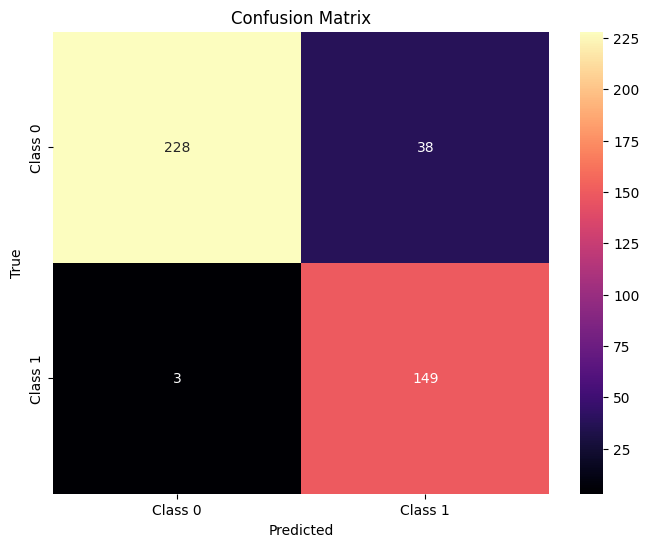

In [96]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="magma", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Model 6


> Gradient Boosting Classifier



In [110]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [2, 3],
    'min_samples_split': [1, 2],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0]
}

In [111]:
gb = GradientBoostingClassifier()
grid_search = RandomizedSearchCV(gb, param_grid, cv=5)
grid_search = grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py", line 420, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_pa

In [112]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)
model6 = grid_search.best_estimator_

Best Hyperparameters: {'subsample': 0.8, 'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 2, 'learning_rate': 0.2}


In [113]:
y_pred = model6.predict(X_test)
mae6 = mean_absolute_error(y_test, y_pred)
accuracy6 = accuracy_score(y_test, y_pred)
print("Mean Absolute Error for  Gradient Boosting CLassification : ", mae6)
print("accuracy score for Gradient Boosting CLassification : ", accuracy6*100)

Mean Absolute Error for  Gradient Boosting CLassification :  0.11722488038277512
accuracy score for Gradient Boosting CLassification :  88.27751196172248


In [114]:
cm = confusion_matrix( y_test, y_pred)

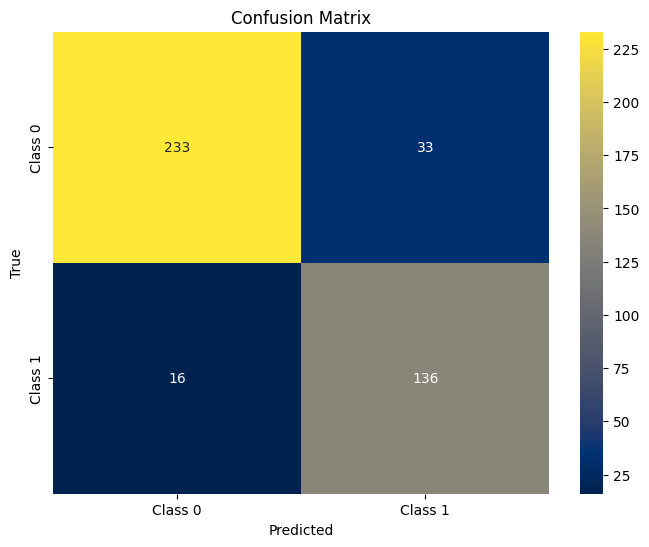

In [115]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="cividis", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Model Evaluation

In [116]:
models = [model1, model2, model3, model4, model5, model6]
model_names = ['SVR', 'Decision Tree', 'Rigid Regression', 'Logistic Regression', 'Random Forest', 'Gradient Boosting']


In [117]:
mse_values = []
accuracy_values = []

In [118]:
for model in models:
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)

    mse_values.append(mse)
    accuracy_values.append(accuracy)

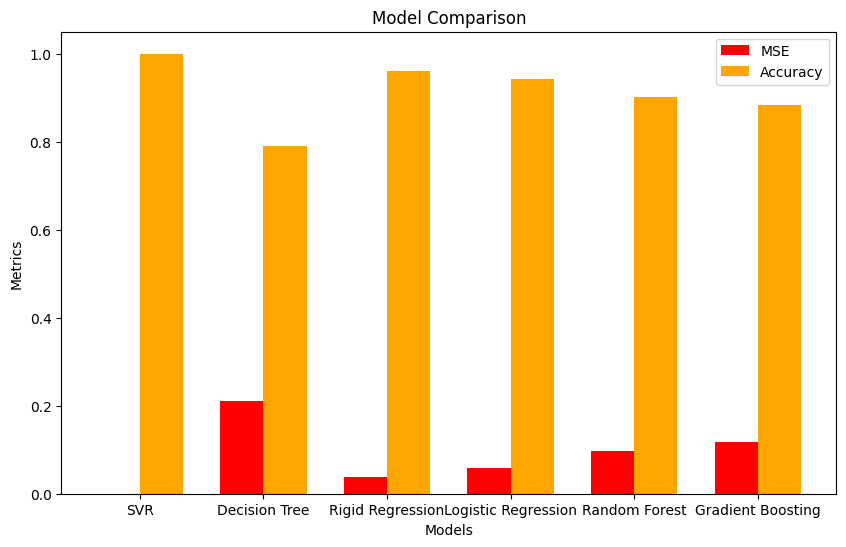

In [119]:
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = np.arange(len(models))

bar1 = ax.bar(index, mse_values, bar_width, label='MSE', color='red')
bar2 = ax.bar(index + bar_width, accuracy_values, bar_width, label='Accuracy', color='orange')

ax.set_xlabel('Models')
ax.set_ylabel('Metrics')
ax.set_title('Model Comparison')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(model_names)
ax.legend()